# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ150_Final_Project/'
os.chdir(drive_path + project_folder)

In [3]:
# Check which files are in your Project folder
os.listdir()

['CSV_11202025-468.zip',
 'Enrollment_Tuition_2023_HC.csv',
 'Tuition_Enrollment_2016(HC).csv',
 'Tuition_Enrollment_2023(HC1).csv',
 'Henry Cooper - Copy of Project_Template.ipynb']

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data23 = pd.read_csv('Tuition_Enrollment_2023(HC1).csv', index_col='unitid')
data23.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'institution name', 'year',
       'HD2023.Control of institution',
       'IC2023_AY.Published in-state tuition and fees 2023-24',
       'DRVEF2023.Undergraduate enrollment'],
      dtype='object')

In [6]:
data23 = data23[['institution name', 'year',
       'HD2023.Control of institution',
       'IC2023_AY.Published in-state tuition and fees 2023-24',
       'DRVEF2023.Undergraduate enrollment']]
data23 = data23.dropna()
data23


,institution name,year,HD2023.Control of institution,IC2023_AY.Published in-state tuition and fees 2023-24,DRVEF2023.Undergraduate enrollment
unitid,,,,,
100654,Alabama A & M University,2023,Public,10024.0,5845.0
100663,University of Alabama at Birmingham,2023,Public,8832.0,12382.0
100706,University of Alabama in Huntsville,2023,Public,11770.0,6851.0
100724,Alabama State University,2023,Public,11248.0,3322.0
100751,The University of Alabama,2023,Public,11900.0,33435.0
...,...,...,...,...,...
498562,Commonwealth University of Pennsylvania,2023,Public,11046.0,9967.0
498571,Pennsylvania Western University,2023,Public,11388.0,8336.0
498809,Yeshiva of Kasho,2023,Private not-for-profit,14000.0,174.0


Looking at changes between tuition and enrollment between two distinct years - 2016 and 2023
# New Section




In [7]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data16 = pd.read_csv('Tuition_Enrollment_2016(HC).csv', index_col='unitid')
# And you can save your dataset after you've worked on it.
#data16.to_csv('Tuition_Enrollment_2016(HC).csv')

In [8]:
data16.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'institution name', 'year',
       'HD2016.Control of institution',
       'IC2016_AY.Published in-state tuition and fees 2016-17',
       'DRVEF2016_RV.Undergraduate enrollment'],
      dtype='object')

In [9]:
data16 = data16[['institution name', 'year',
       'HD2016.Control of institution',
       'IC2016_AY.Published in-state tuition and fees 2016-17',
       'DRVEF2016_RV.Undergraduate enrollment']]
data16 = data16.dropna()
data16

,institution name,year,HD2016.Control of institution,IC2016_AY.Published in-state tuition and fees 2016-17,DRVEF2016_RV.Undergraduate enrollment
unitid,,,,,
100654,Alabama A & M University,2016,Public,9366.0,4851.0
100663,University of Alabama at Birmingham,2016,Public,8040.0,12369.0
100690,Amridge University,2016,Private not-for-profit,7180.0,294.0
100706,University of Alabama in Huntsville,2016,Public,9842.0,6507.0
100724,Alabama State University,2016,Public,9220.0,4727.0
...,...,...,...,...,...
488350,Yeshiva Gedolah Shaarei Shmuel,2016,Private not-for-profit,7700.0,84.0
488679,Indiana Wesleyan University-National & Global,2016,Private not-for-profit,9791.0,6970.0
488846,University of the People,2016,Private not-for-profit,1000.0,4390.0


## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

In [10]:
# merge data16 and data23
data = data16.merge(data23, right_index=True, left_index=True)

In [11]:
data['tuition_difference'] = data['IC2023_AY.Published in-state tuition and fees 2023-24'] - data['IC2016_AY.Published in-state tuition and fees 2016-17']

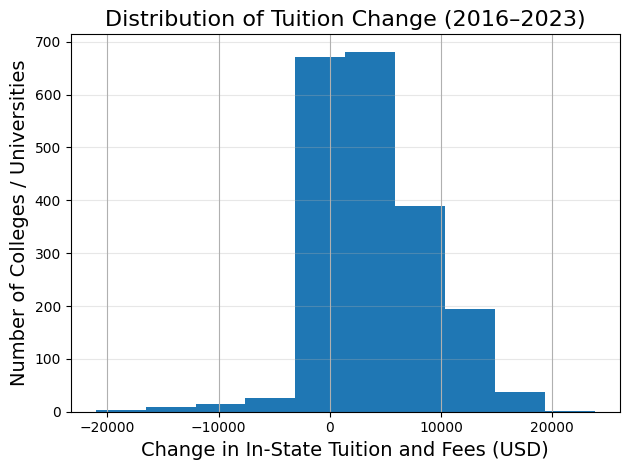

In [12]:
data['tuition_difference'].hist()
plt.title('Distribution of Tuition Change (2016–2023)', fontsize=16)
plt.xlabel('Change in In-State Tuition and Fees (USD)', fontsize=14)
plt.ylabel('Number of Colleges / Universities', fontsize=14)

# Set font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

In [13]:
data['enrollment_difference'] = data['DRVEF2023.Undergraduate enrollment'] - data['DRVEF2016_RV.Undergraduate enrollment']

Text(0, 0.5, 'Number of Colleges / Universities')

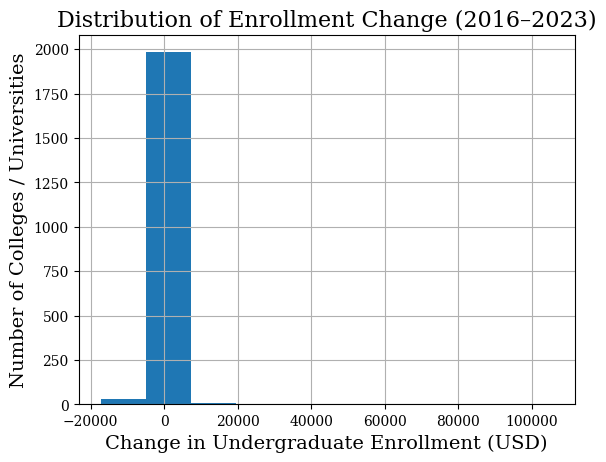

In [15]:
data['enrollment_difference'].hist()
plt.title('Distribution of Enrollment Change (2016–2023)', fontsize=16)
plt.xlabel('Change in Undergraduate Enrollment (USD)', fontsize=14)
plt.ylabel('Number of Colleges / Universities', fontsize=14)

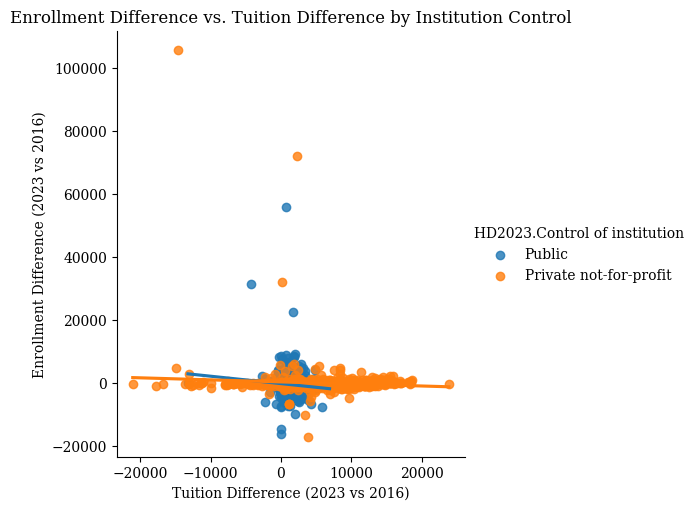

In [15]:
sns.lmplot(data=data, x='tuition_difference', y='enrollment_difference', hue='HD2023.Control of institution', scatter=True, ci=None)
plt.title('Enrollment Difference vs. Tuition Difference by Institution Control')
plt.xlabel('Tuition Difference (2023 vs 2016)')
plt.ylabel('Enrollment Difference (2023 vs 2016)')
plt.show()

In [21]:
data = data16.merge(data23, right_index=True, left_index=True)
data['tuition_difference'] = data['IC2023_AY.Published in-state tuition and fees 2023-24'] - data['IC2016_AY.Published in-state tuition and fees 2016-17']
data['enrollment_difference'] = data['DRVEF2023.Undergraduate enrollment'] - data['DRVEF2016_RV.Undergraduate enrollment']


data['arcsinh_tuition_difference'] = np.arcsinh(data['tuition_difference'])
data['arcsinh_enrollment_difference'] = np.arcsinh(data['enrollment_difference'])



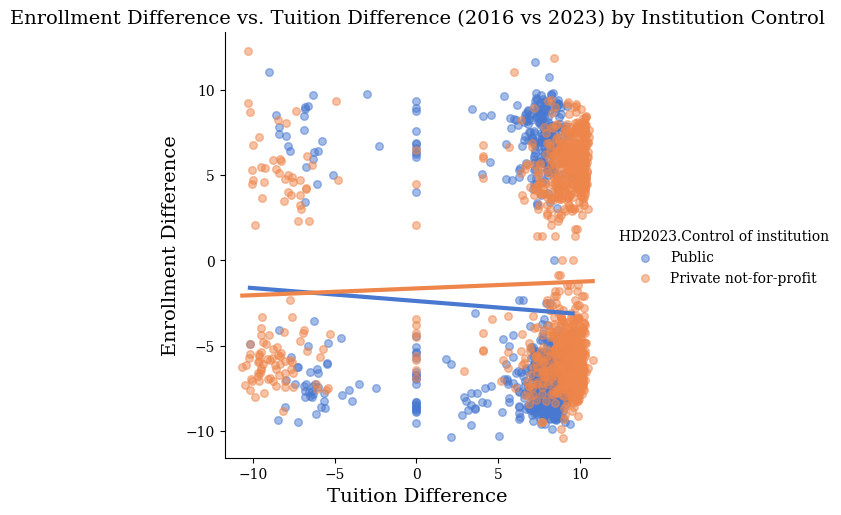

In [23]:
#adjust scatterplot

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

data['arcsinh_tuition_difference'] = np.arcsinh(data['tuition_difference'])
data['arcsinh_enrollment_difference'] = np.arcsinh(data['enrollment_difference'])

sns.lmplot(data=data, x='arcsinh_tuition_difference', y='arcsinh_enrollment_difference', hue='HD2023.Control of institution', scatter=True, ci=None, palette='muted', line_kws={'linewidth': 3}, scatter_kws={'s': 30, 'alpha': 0.5})
plt.title('Enrollment Difference vs. Tuition Difference (2016 vs 2023) by Institution Control', fontsize = 14)
plt.xlabel('Tuition Difference', fontsize = 14)
plt.ylabel('Enrollment Difference', fontsize = 14)
plt.show()

In [24]:
model_arcsinh_robust = smf.ols( "arcsinh_enrollment_difference ~ arcsinh_tuition_difference * C(Q('HD2023.Control of institution'))", data=data).fit(cov_type='HC3')
display(model_arcsinh_robust.summary())
print("arcsinh model summary with HC3 robust standard errors displayed.")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     arcsinh_enrollment_difference   R-squared:                       0.015
Model:                                       OLS   Adj. R-squared:                  0.014
Method:                            Least Squares   F-statistic:                     9.734
Date:                           Thu, 11 Dec 2025   Prob (F-statistic):           2.24e-06
Time:                                   05:54:55   Log-Likelihood:                -6598.3
No. Observations:                           2025   AIC:                         1.320e+04
Df Residuals:                               2021   BIC:                         1.323e+04
Df Model:                                      3                                         
Covariance Type:                             HC3                                         
==============================================================================================================================================
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     -1.6488      0.292     -5.654      0.000      -2.220      -1.077
C(Q('HD2023.Control of institution'))[T.Public]                               -0.7399      0.540     -1.370      0.171      -1.798       0.319
arcsinh_tuition_difference                                                     0.0396      0.032      1.234      0.217      -0.023       0.102
arcsinh_tuition_difference:C(Q('HD2023.Control of institution'))[T.Public]    -0.1157      0.069     -1.684      0.092      -0.250       0.019
==============================================================================
Omnibus:                     7739.947   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.976
Skew:                           0.614   Prob(JB):                     5.30e-60
Kurtosis:                       1.687   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

arcsinh model summary with HC3 robust standard errors displayed.


## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)